In [ ]:
SDSSJ135445

In [ ]:
SDSSJ135445.66+002050.2

In [12]:
name='SDSS J135445.66+002050.2'

In [ ]:
#SkyCoord(ra='00h20m50.6707266504s', dec='+27d44m40.212376512s', frame="icrs",) 

In [32]:
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import coordinates as coords
from astroquery.sdss import SDSS


#co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
co= SkyCoord(ra='13h54m45.7s', dec='+00d20m50s', frame="icrs",) 

result = SDSS.query_region(co, spectro=True)
#spec = SDSS.get_spectra(matches=result)

In [35]:
result

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
208.690235979608,0.347301554396751,1237651504882581550,1404,301,4,65,2.495359,301,51641,388,339002552118962176,26,SDSS
208.690235979608,0.347301554396751,1237651504882581550,1404,301,4,65,2.494731,301,51942,385,339001732535183360,26,SDSS
208.690235979608,0.347301554396751,1237651504882581550,1404,301,4,65,2.501387,4040,55605,930,4548891354134978560,v5_10_0,BOSS


In [38]:
co.ra.deg,co.dec.deg

(208.69041666666664, 0.3472222222222222)

In [34]:
spec = SDSS.get_spectra(co)

HTTPError: HTTP Error 404: Not Found

spec = SDSS.get_spectra(plate=7694, mjd=57359,fiberID=29)  #7694 57359 29 fiber=29

In [37]:
spec = SDSS.get_spectra(matches=result)

HTTPError: HTTP Error 404: Not Found

In [51]:
for index in range(3):
    plate = result['plate'][index]
    mjd = result['mjd'][index]
    fiber = result['fiberID'][index]
    print(plate,',',mjd,',',fiber)
    

301 , 51641 , 388
301 , 51942 , 385
4040 , 55605 , 930


In [46]:
index=0
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
print(plate,mjd,fiber)

301 51641 388


In [47]:
index=1
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
print(plate,mjd,fiber)

301 51942 385


In [50]:
index=2
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
print(plate,mjd,fiber)

4040 55605 930


In [53]:
index=1
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
spec = fetch_sdss_spectrum(round(plate), round(mjd), round(fiber))#plate, mjd, fiber

In [ ]:
result

http://das.sdss.org/raw/spectro/1d_1919895156/7694/1d/spSpec-57359-7694-029.fit

In [40]:
print(plate,mjd,fiber)

301 51641 388


之所以限制 plate 值小于 3000，是因为发现大于 3000，即 SEGUE-2 后的数据总是有 404 错误，这点不知为何。期待解答。

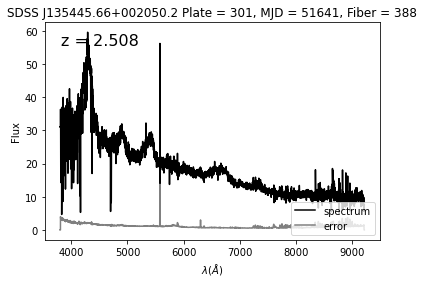

In [55]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum


index=0
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
spec = fetch_sdss_spectrum(round(plate), round(mjd), round(fiber))#plate, mjd, fiber
#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('%(name)s Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.3f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

#ax.set_ylim(-10, 300)

plt.show()

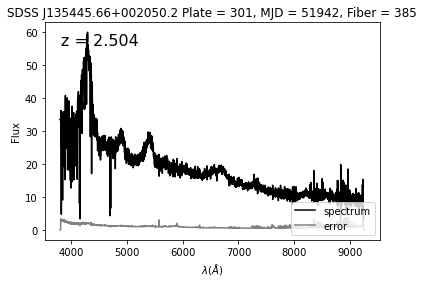

In [56]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum


index=1
plate = result['plate'][index]
mjd = result['mjd'][index]
fiber = result['fiberID'][index]
spec = fetch_sdss_spectrum(round(plate), round(mjd), round(fiber))#plate, mjd, fiber
#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('%(name)s Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.3f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

#ax.set_ylim(-10, 300)

plt.show()